# KMeans to test multiple dimensions at a time (number)

## 0. Data Loading : dataset of NOUN + ADJ

In [1]:
import pandas as pd

# WE loading
all_n_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv', index_col=0).drop(columns=["gender"])
all_a_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv', index_col=0).drop(columns = ["gender"])
all_na_we = pd.concat([all_n_we, all_a_we])

# Normalization: values fall within -1 and 1
for i in range(512):

    values, copy = list(all_na_we[str(i)]), list(all_na_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_na_we[str(i)] = [val / (max_ - min_) for val in values]

all_na_we["number"] = all_na_we["number"].apply(lambda x: 0 if x == "singular" else 1)
all_na_we.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,number
Word,,,,,,,,,,,,,,,,,,,,,
abaisse,0.216157,-0.170059,0.044470,0.175621,-0.094953,-0.185223,-0.038133,-0.035881,0.203076,0.197348,...,0.185762,-0.082828,0.023871,-0.052849,-0.267209,-0.440458,-0.227911,-0.021792,-0.066126,0
abandonnée,0.182921,0.057632,0.030306,-0.141095,0.005679,-0.319613,-0.188934,-0.008268,-0.175404,-0.003653,...,0.023211,-0.052559,-0.200903,-0.081681,-0.337104,-0.226090,-0.244174,0.193163,-0.025129,0
abattue,0.255641,0.041142,0.098859,-0.003551,-0.013146,-0.248013,-0.062373,0.089560,0.101922,0.065361,...,0.038298,-0.066444,-0.088245,-0.185171,-0.425530,-0.397078,-0.164545,-0.047245,-0.009865,0
abbaye,0.201809,-0.198303,0.099785,0.006154,0.204330,-0.271341,-0.203044,-0.136419,-0.079570,0.065823,...,-0.279662,0.195957,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.207349,0
abdominale,0.206962,-0.012562,0.236902,0.032328,0.015707,-0.184198,-0.119463,-0.360880,0.426199,0.266727,...,0.266714,-0.034519,-0.078115,-0.001525,-0.120634,-0.262442,-0.000265,0.190060,-0.181128,0


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

## Testing 1 Dimension at a time  
execution time ~23sec.

In [4]:
dim_list_1= [str(i) for i in range(512)] # all dimensions
df_clustering_1 = pd.DataFrame(columns = ["ARI"])
ari = []

for dim in dim_list_1:

    # Clustering using Kmeans
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim].values.reshape(-1, 1))

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["number"], km.labels_))

df_clustering_1["ARI"] = ari
df_clustering_1.index = dim_list_1

In [5]:
top10_1 = df_clustering_1.sort_values(by = "ARI", ascending = False)
dim_top10_1 = list(top10_1.head(10).index)
top10_1.head(10)

,ARI
310,0.107770
54,0.070270
285,0.057553
288,0.050055
278,0.049689
81,0.049640
25,0.040483
495,0.035886
250,0.035385
243,0.034056


## Testing 2 dimensions at a time  
Execution time ~ 142min

In [6]:
dim_list_2 = [[str(i), str(j)] for i in range(512) for j in range(512) if i < j] # all pairs of dimensions
print("Total number of combinations: ", len(dim_list_2))

df_clustering_2 = pd.DataFrame(columns = ["ARI"])
ari = []


for i, dim in enumerate(dim_list_2):

    # Clustering using Kmeans
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim])

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["number"], km.labels_))

    if i % (len(dim_list_2)//10) == 0:
        print("Progress: ", (i//len(dim_list_2))*100, "%")

df_clustering_2["ARI"] = ari

Total number of combinations:  130816
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %


In [7]:
df_clustering_2.index = [str(dim_tuple) for dim_tuple in dim_list_2]
top10_2 = df_clustering_2.sort_values(by = "ARI", ascending = False)
dim_top10_2 = list(top10_2.head(10).index)
top10_2.head(10)

,ARI
"['285', '310']",0.174154
"['278', '310']",0.166110
"['54', '310']",0.166045
"['136', '310']",0.146689
"['310', '359']",0.142411
"['257', '310']",0.140785
"['81', '310']",0.140054
"['200', '310']",0.138901
"['25', '310']",0.138762
"['246', '310']",0.135341


In [8]:
print(dim_top10_1)
print(dim_top10_2)

['310', '54', '285', '288', '278', '81', '25', '495', '250', '243']
["['285', '310']", "['278', '310']", "['54', '310']", "['136', '310']", "['310', '359']", "['257', '310']", "['81', '310']", "['200', '310']", "['25', '310']", "['246', '310']"]


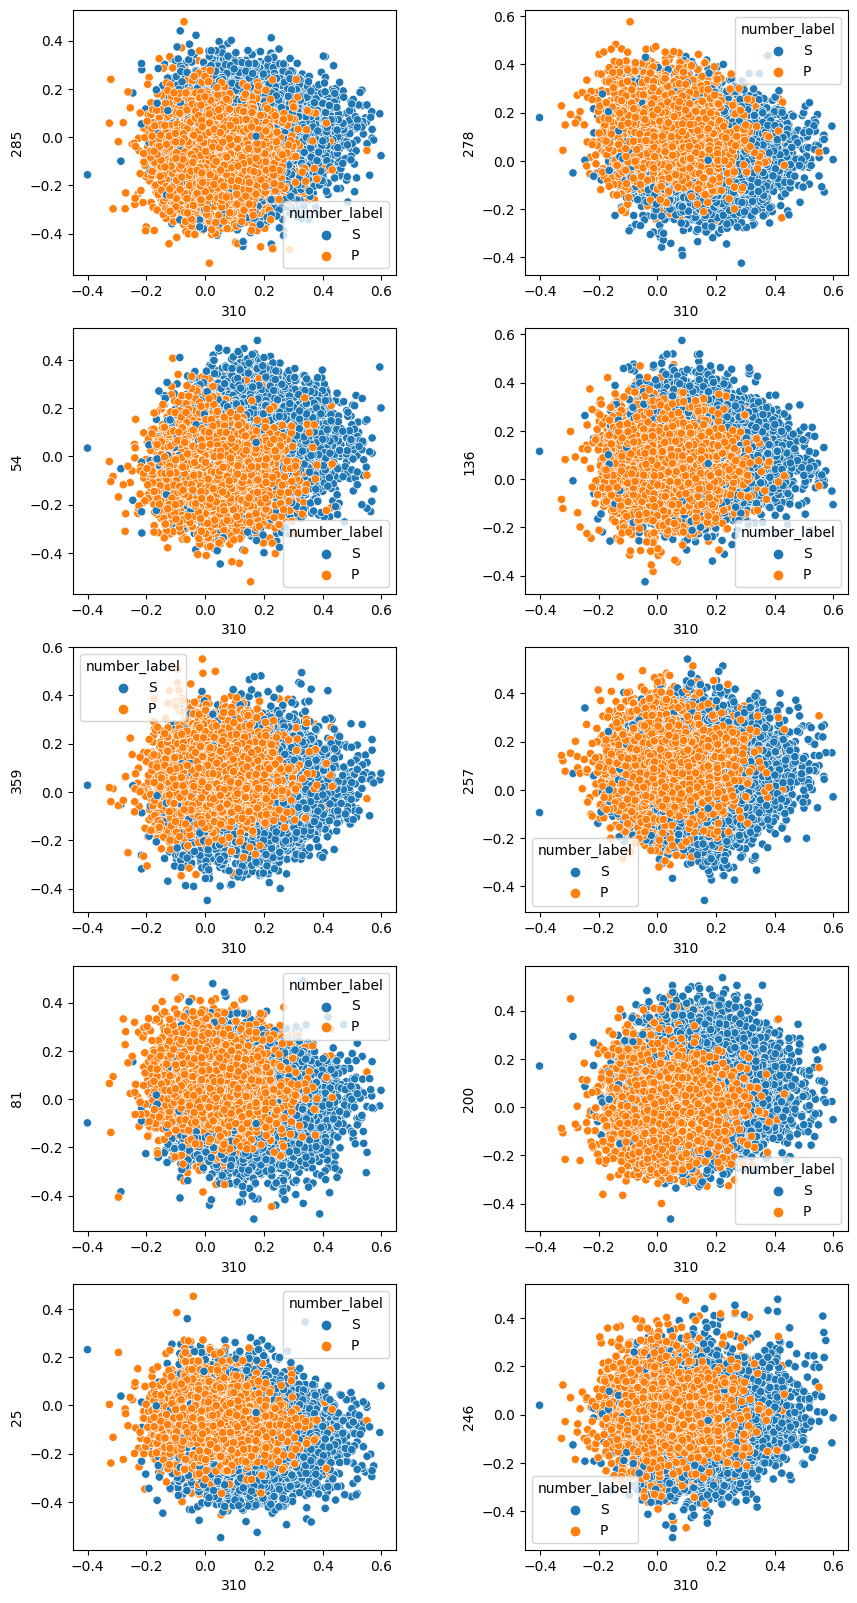

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

# create a figure with 10 subplots
fig, axes = plt.subplots(5, 2, figsize=((10,20)))
fig.subplots_adjust( wspace=0.4)

all_na_we["number_label"] = all_na_we["number"].apply(lambda x:"S" if x == 0 else "P")

sns.scatterplot(data = all_na_we, x = "310", y = "285", hue = "number_label", ax = axes[0, 0])
sns.scatterplot(data = all_na_we, x = "310", y = "278", hue = "number_label", ax = axes[0, 1])
sns.scatterplot(data = all_na_we, x = "310", y = "54", hue = "number_label", ax = axes[1, 0])
sns.scatterplot(data = all_na_we, x = "310", y = "136", hue = "number_label", ax = axes[1, 1])
sns.scatterplot(data = all_na_we, x = "310", y = "359", hue = "number_label", ax = axes[2, 0])
sns.scatterplot(data = all_na_we, x = "310", y = "257", hue = "number_label", ax = axes[2, 1])
sns.scatterplot(data = all_na_we, x = "310", y = "81", hue = "number_label", ax = axes[3, 0])
sns.scatterplot(data = all_na_we, x = "310", y = "200", hue = "number_label", ax = axes[3, 1])
sns.scatterplot(data = all_na_we, x = "310", y = "25", hue = "number_label", ax = axes[4, 0])
sns.scatterplot(data = all_na_we, x = "310", y = "246", hue = "number_label", ax = axes[4, 1])

plt.savefig("10_scatterplots_nb.png", bbox_inches='tight')
plt.show()

## 3 dimensions at a time (a selection only)

In [1]:
# all dimensions encountered up to now
dims = ["310", "285", "278", "54", "136", "359", "257", "81", "200", "25", "246", "288", "25", "495", "250", "243"]
dims.sort()
print(dims, len(dims))

['136', '200', '243', '246', '25', '25', '250', '257', '278', '285', '288', '310', '359', '495', '54', '81'] 16


In [3]:
# combinations of 3 dimensions having 2 dimensions in common with the previous combinations
tuples = [[i,j,str(k)] for i in dims for j in dims for k in range(512) if i < j and j < str(k)]

print("Total number of combinations: ", len(tuples))

Total number of combinations:  25104


In [4]:
df_clustering_3 = pd.DataFrame(columns = ["ARI"])
ari = []


for i, dim in enumerate(tuples):

    # Clustering using Kmeans
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim])

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["number"], km.labels_))

    if i % (len(tuples)//10) == 0:
        print("Progress: ", (i//len(tuples))*100, "%")

df_clustering_3["ARI"] = ari
df_clustering_3.index = [str(dim_tuple) for dim_tuple in tuples]

Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %
Progress:  0 %


In [5]:
top10_3 = df_clustering_3.sort_values(by = "ARI", ascending = False)
dim_top10_3 = list(top10_3.head(10).index)
top10_3.head(10)

,ARI
"['278', '285', '310']",0.230391
"['285', '310', '54']",0.214141
"['310', '54', '81']",0.212742
"['278', '310', '81']",0.201647
"['200', '278', '310']",0.200336
"['278', '310', '5']",0.198056
"['310', '54', '8']",0.197210
"['136', '285', '310']",0.196099
"['278', '310', '359']",0.193616
"['25', '310', '54']",0.191318


## 4 dimensions

In [6]:
quadruplets = [[i,j,k,l] for i in dims for j in dims for k in dims for l in dims if i < j and j < k and k < l]
print("Total number of combinations: ", len(quadruplets))

Total number of combinations:  1729


In [7]:
df_clustering_4 = pd.DataFrame(columns = ["ARI"])
ari = []

for dim in quadruplets:
    
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim])

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["number"], km.labels_))

df_clustering_4["ARI"] = ari
df_clustering_4.index = [str(dim_tuple) for dim_tuple in quadruplets]

In [8]:
top10_4 = df_clustering_4.sort_values(by = "ARI", ascending = False)
dim_top10_4 = list(top10_4.head(10).index)
top10_4.head(10)

,ARI
"['250', '278', '285', '310']",0.274814
"['200', '250', '278', '310']",0.262526
"['200', '278', '285', '310']",0.250346
"['250', '310', '54', '81']",0.249242
"['250', '285', '310', '54']",0.241674
"['278', '285', '310', '54']",0.241151
"['285', '310', '54', '81']",0.241034
"['257', '310', '54', '81']",0.239066
"['246', '278', '285', '310']",0.238849
"['310', '359', '54', '81']",0.238643


## 5 dimensions

In [9]:
quintuplets = [[i,j,k,l,m] for i in dims for j in dims for k in dims for l in dims for m in dims if i < j and j < k and k < l and l < m]
print("Total number of combinations: ", len(quintuplets))

df_clustering_5 = pd.DataFrame(columns = ["ARI"])
ari = []

for dim in quintuplets:

    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim])

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["number"], km.labels_))

df_clustering_5["ARI"] = ari
df_clustering_5.index = [str(dim_tuple) for dim_tuple in quintuplets]

top10_5 = df_clustering_5.sort_values(by = "ARI", ascending = False)
dim_top10_5 = list(top10_5.head(10).index)
top10_5.head(10)

Total number of combinations:  4004


,ARI
"['250', '310', '359', '54', '81']",0.299470
"['250', '278', '285', '310', '359']",0.298622
"['200', '250', '278', '310', '81']",0.293449
"['200', '250', '278', '310', '359']",0.288061
"['250', '285', '310', '54', '81']",0.281462
"['136', '250', '310', '54', '81']",0.280734
"['200', '246', '250', '278', '310']",0.279736
"['136', '250', '278', '285', '310']",0.279565
"['246', '250', '278', '285', '310']",0.279415
"['200', '250', '278', '285', '310']",0.277935


## All highlighted dimensions

In [10]:
km = KMeans(n_clusters=2, random_state=42, n_init=10)
km.fit(all_na_we[dims])
print(adjusted_rand_score(all_na_we["number"], km.labels_))

0.34648618223227157


### All 512 dimensions

In [3]:
km = KMeans(n_clusters=2, random_state=42, n_init=10)
km.fit(all_na_we[[str(i) for i in range(512)]])
print(adjusted_rand_score(all_na_we["number"], km.labels_))

-0.0005599235467651072
